## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc
from sklearn import inspection
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import warnings
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

%matplotlib inline

## 1: Data Exploration Tasks

### Question 1

In [2]:
df = pd.read_excel('./weld_defect_dataset(1).xlsx')

subset_1 = pd.read_excel('./weld_defect_dataset(1).xlsx', sheet_name='subset1')
subset_2 = pd.read_excel('./weld_defect_dataset(1).xlsx', sheet_name='subset2')
subset_3 = pd.read_excel('./weld_defect_dataset(1).xlsx', sheet_name='subset3')
subset_4 = pd.read_excel('./weld_defect_dataset(1).xlsx', sheet_name='subset4')
subset_5 = pd.read_excel('./weld_defect_dataset(1).xlsx', sheet_name='subset5')

### Question 2

In [3]:
print(subset_1.info())
print(subset_2.info())
print(subset_3.info())
print(subset_4.info())
print(subset_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    44 non-null     object 
 1   W       44 non-null     float64
 2   Ar      44 non-null     float64
 3   Sp      44 non-null     float64
 4   Re      44 non-null     float64
 5   Rr      44 non-null     float64
 6   Sk      44 non-null     float64
 7   Ku      44 non-null     float64
 8   Hc      44 non-null     float64
 9   Rc      44 non-null     float64
 10  Sc      44 non-null     float64
 11  Kc      44 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    44 non-null     object 
 1   W       44 non-null     float64
 2   Ar      44 non-null     float64
 3   Sp      44 non-null     floa

In [4]:
print(subset_1.dtypes)
print(subset_2.dtypes)
print(subset_3.dtypes)
print(subset_4.dtypes)
print(subset_5.dtypes)

Type     object
W       float64
Ar      float64
Sp      float64
Re      float64
Rr      float64
Sk      float64
Ku      float64
Hc      float64
Rc      float64
Sc      float64
Kc      float64
dtype: object
Type     object
W       float64
Ar      float64
Sp      float64
Re      float64
Rr      float64
Sk      float64
Ku      float64
Hc      float64
Rc      float64
Sc      float64
Kc      float64
dtype: object
Type     object
W       float64
Ar      float64
Sp      float64
Re      float64
Rr      float64
Sk      float64
Ku      float64
Hc      float64
Rc      float64
Sc      float64
Kc      float64
dtype: object
Type     object
W       float64
Ar      float64
Sp      float64
Re      float64
Rr      float64
Sk      float64
Ku      float64
Hc      float64
Rc      float64
Sc      float64
Kc      float64
dtype: object
Type     object
W       float64
Ar      float64
Sp      float64
Re      float64
Rr      float64
Sk      float64
Ku      float64
Hc      float64
Rc      float64
Sc      float64


In [5]:
display(subset_1.describe())
display(subset_2.describe())
display(subset_3.describe())
display(subset_4.describe())
display(subset_5.describe())

,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.193312,0.219518,0.596164,0.408728,0.244100,0.190435,0.618382,0.114831,0.227141,0.222136,0.468713
std,0.220107,0.260694,0.217955,0.274365,0.223650,0.171583,0.145415,0.157291,0.209002,0.113051,0.138047
min,0.007163,0.003448,0.192400,0.004051,0.001971,0.011205,0.269329,0.001358,0.032748,0.002616,0.100178
25%,0.041189,0.014874,0.415600,0.145802,0.087699,0.080167,0.536612,0.017436,0.110421,0.142772,0.412662
50%,0.088109,0.062179,0.551800,0.492258,0.169426,0.115660,0.585224,0.038245,0.155732,0.215720,0.468566
75%,0.280444,0.393534,0.830500,0.599842,0.330571,0.243957,0.672636,0.131052,0.218242,0.292278,0.545424
max,1.000000,0.826724,0.928000,1.007173,0.998562,0.681613,1.113649,0.617477,1.001281,0.571364,0.911416


,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.171920,0.221983,0.626300,0.381836,0.283699,0.139522,0.617771,0.107800,0.227451,0.241102,0.478477
std,0.169081,0.277293,0.205277,0.254174,0.223000,0.111367,0.149944,0.189615,0.178100,0.144315,0.171339
min,0.008596,0.003448,0.215200,0.039705,0.007348,0.015586,0.370475,0.001259,0.004129,0.017908,0.028573
25%,0.039040,0.018295,0.434900,0.129346,0.107630,0.062645,0.525774,0.011598,0.121717,0.158709,0.369364
50%,0.089542,0.068343,0.651400,0.399199,0.260155,0.107097,0.583242,0.031613,0.183937,0.210481,0.492166
75%,0.315545,0.348277,0.823700,0.605137,0.369443,0.190528,0.679345,0.118108,0.278923,0.319537,0.583294
max,0.626074,1.037931,1.022000,0.979030,1.003975,0.591822,1.202949,1.049198,0.898580,0.718818,1.025173


,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.175990,0.192522,0.599514,0.391578,0.229998,0.157309,0.599442,0.095924,0.200883,0.275657,0.476780
std,0.199437,0.249945,0.213497,0.268805,0.201739,0.149837,0.145750,0.139912,0.142521,0.172285,0.149602
min,0.001433,0.003448,0.121600,0.001080,0.000118,0.009171,0.324976,0.000013,0.023279,0.042955,0.135933
25%,0.034026,0.010862,0.414557,0.134452,0.087573,0.058014,0.528127,0.013522,0.108474,0.167274,0.365738
50%,0.078797,0.051508,0.588600,0.354177,0.190185,0.107354,0.564113,0.034533,0.155466,0.235644,0.482648
75%,0.251433,0.295556,0.826200,0.610379,0.285549,0.198178,0.632794,0.089647,0.256009,0.352900,0.548107
max,0.931232,0.943886,1.007200,0.870844,0.928504,0.614175,1.133864,0.555182,0.624799,1.000876,0.871929


,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.162445,0.182950,0.551000,0.388962,0.243680,0.159390,0.606099,0.062449,0.205242,0.239475,0.465242
std,0.189167,0.224560,0.235778,0.262897,0.196418,0.146959,0.153890,0.081820,0.153659,0.126132,0.129730
min,0.010029,0.003448,0.025200,0.000591,0.014878,0.004849,0.268294,0.002518,0.062098,0.016877,0.189451
25%,0.034384,0.014299,0.373300,0.130221,0.072024,0.061892,0.516842,0.010705,0.098872,0.139052,0.354283
50%,0.070917,0.056631,0.541200,0.456645,0.216895,0.104379,0.573514,0.028763,0.151447,0.223547,0.478614
75%,0.203797,0.392164,0.804600,0.577700,0.352165,0.188742,0.699122,0.079133,0.240478,0.308780,0.540304
max,0.757880,0.768966,0.943200,0.838397,0.686809,0.628623,1.027199,0.403848,0.756361,0.717216,0.741735


,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.175860,0.220914,0.623318,0.391490,0.243808,0.190940,0.582134,0.080576,0.219547,0.225331,0.502365
std,0.188479,0.276367,0.209529,0.277337,0.203288,0.221725,0.163183,0.095121,0.180705,0.152141,0.164504
min,0.007163,0.003448,0.157200,0.002152,0.000200,0.001608,0.168895,0.002135,0.013219,0.001474,0.155346
25%,0.038682,0.009670,0.438300,0.135696,0.093246,0.074033,0.495114,0.015487,0.099992,0.131640,0.416361
50%,0.090974,0.059112,0.638000,0.437933,0.199206,0.132192,0.563511,0.035016,0.178824,0.213700,0.498491
75%,0.263968,0.362931,0.783000,0.606814,0.334925,0.158128,0.643986,0.125883,0.265546,0.309116,0.582118
max,0.816619,0.949262,1.026800,1.007173,0.817756,1.002376,1.128828,0.378949,0.757683,0.729507,0.990413


### Question 3

In [6]:
print(subset_1.isna().sum())
print(subset_2.isna().sum())
print(subset_3.isna().sum())
print(subset_4.isna().sum())
print(subset_5.isna().sum())

Type    0
W       0
Ar      0
Sp      0
Re      0
Rr      0
Sk      0
Ku      0
Hc      0
Rc      0
Sc      0
Kc      0
dtype: int64
Type    0
W       0
Ar      0
Sp      0
Re      0
Rr      0
Sk      0
Ku      0
Hc      0
Rc      0
Sc      0
Kc      0
dtype: int64
Type    0
W       0
Ar      0
Sp      0
Re      0
Rr      0
Sk      0
Ku      0
Hc      0
Rc      0
Sc      0
Kc      0
dtype: int64
Type    0
W       0
Ar      0
Sp      0
Re      0
Rr      0
Sk      0
Ku      0
Hc      0
Rc      0
Sc      0
Kc      0
dtype: int64
Type    0
W       0
Ar      0
Sp      0
Re      0
Rr      0
Sk      0
Ku      0
Hc      0
Rc      0
Sc      0
Kc      0
dtype: int64


No null values are there.

### Question 4

In [7]:
display(subset_1[subset_1.duplicated()])
display(subset_2[subset_2.duplicated()])
display(subset_3[subset_3.duplicated()])
display(subset_4[subset_4.duplicated()])
display(subset_5[subset_5.duplicated()])

,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


No duplicate values are available in the dataframes

### Question 5

In [8]:
display(subset_1[subset_1.duplicated()])
display(subset_2[subset_2.duplicated()])
display(subset_3[subset_3.duplicated()])
display(subset_4[subset_4.duplicated()])
display(subset_5[subset_5.duplicated()])

,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


,Type,W,Ar,Sp,Re,Rr,Sk,Ku,Hc,Rc,Sc,Kc


### Question 6

In [9]:
print(subset_1.info())
print(subset_2.info())
print(subset_3.info())
print(subset_4.info())
print(subset_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    44 non-null     object 
 1   W       44 non-null     float64
 2   Ar      44 non-null     float64
 3   Sp      44 non-null     float64
 4   Re      44 non-null     float64
 5   Rr      44 non-null     float64
 6   Sk      44 non-null     float64
 7   Ku      44 non-null     float64
 8   Hc      44 non-null     float64
 9   Rc      44 non-null     float64
 10  Sc      44 non-null     float64
 11  Kc      44 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    44 non-null     object 
 1   W       44 non-null     float64
 2   Ar      44 non-null     float64
 3   Sp      44 non-null     floa

### Question 7

There are no column in the dataframe that could be used as categorical data. So we can skip the pd.get_dummies part.

### Question 8

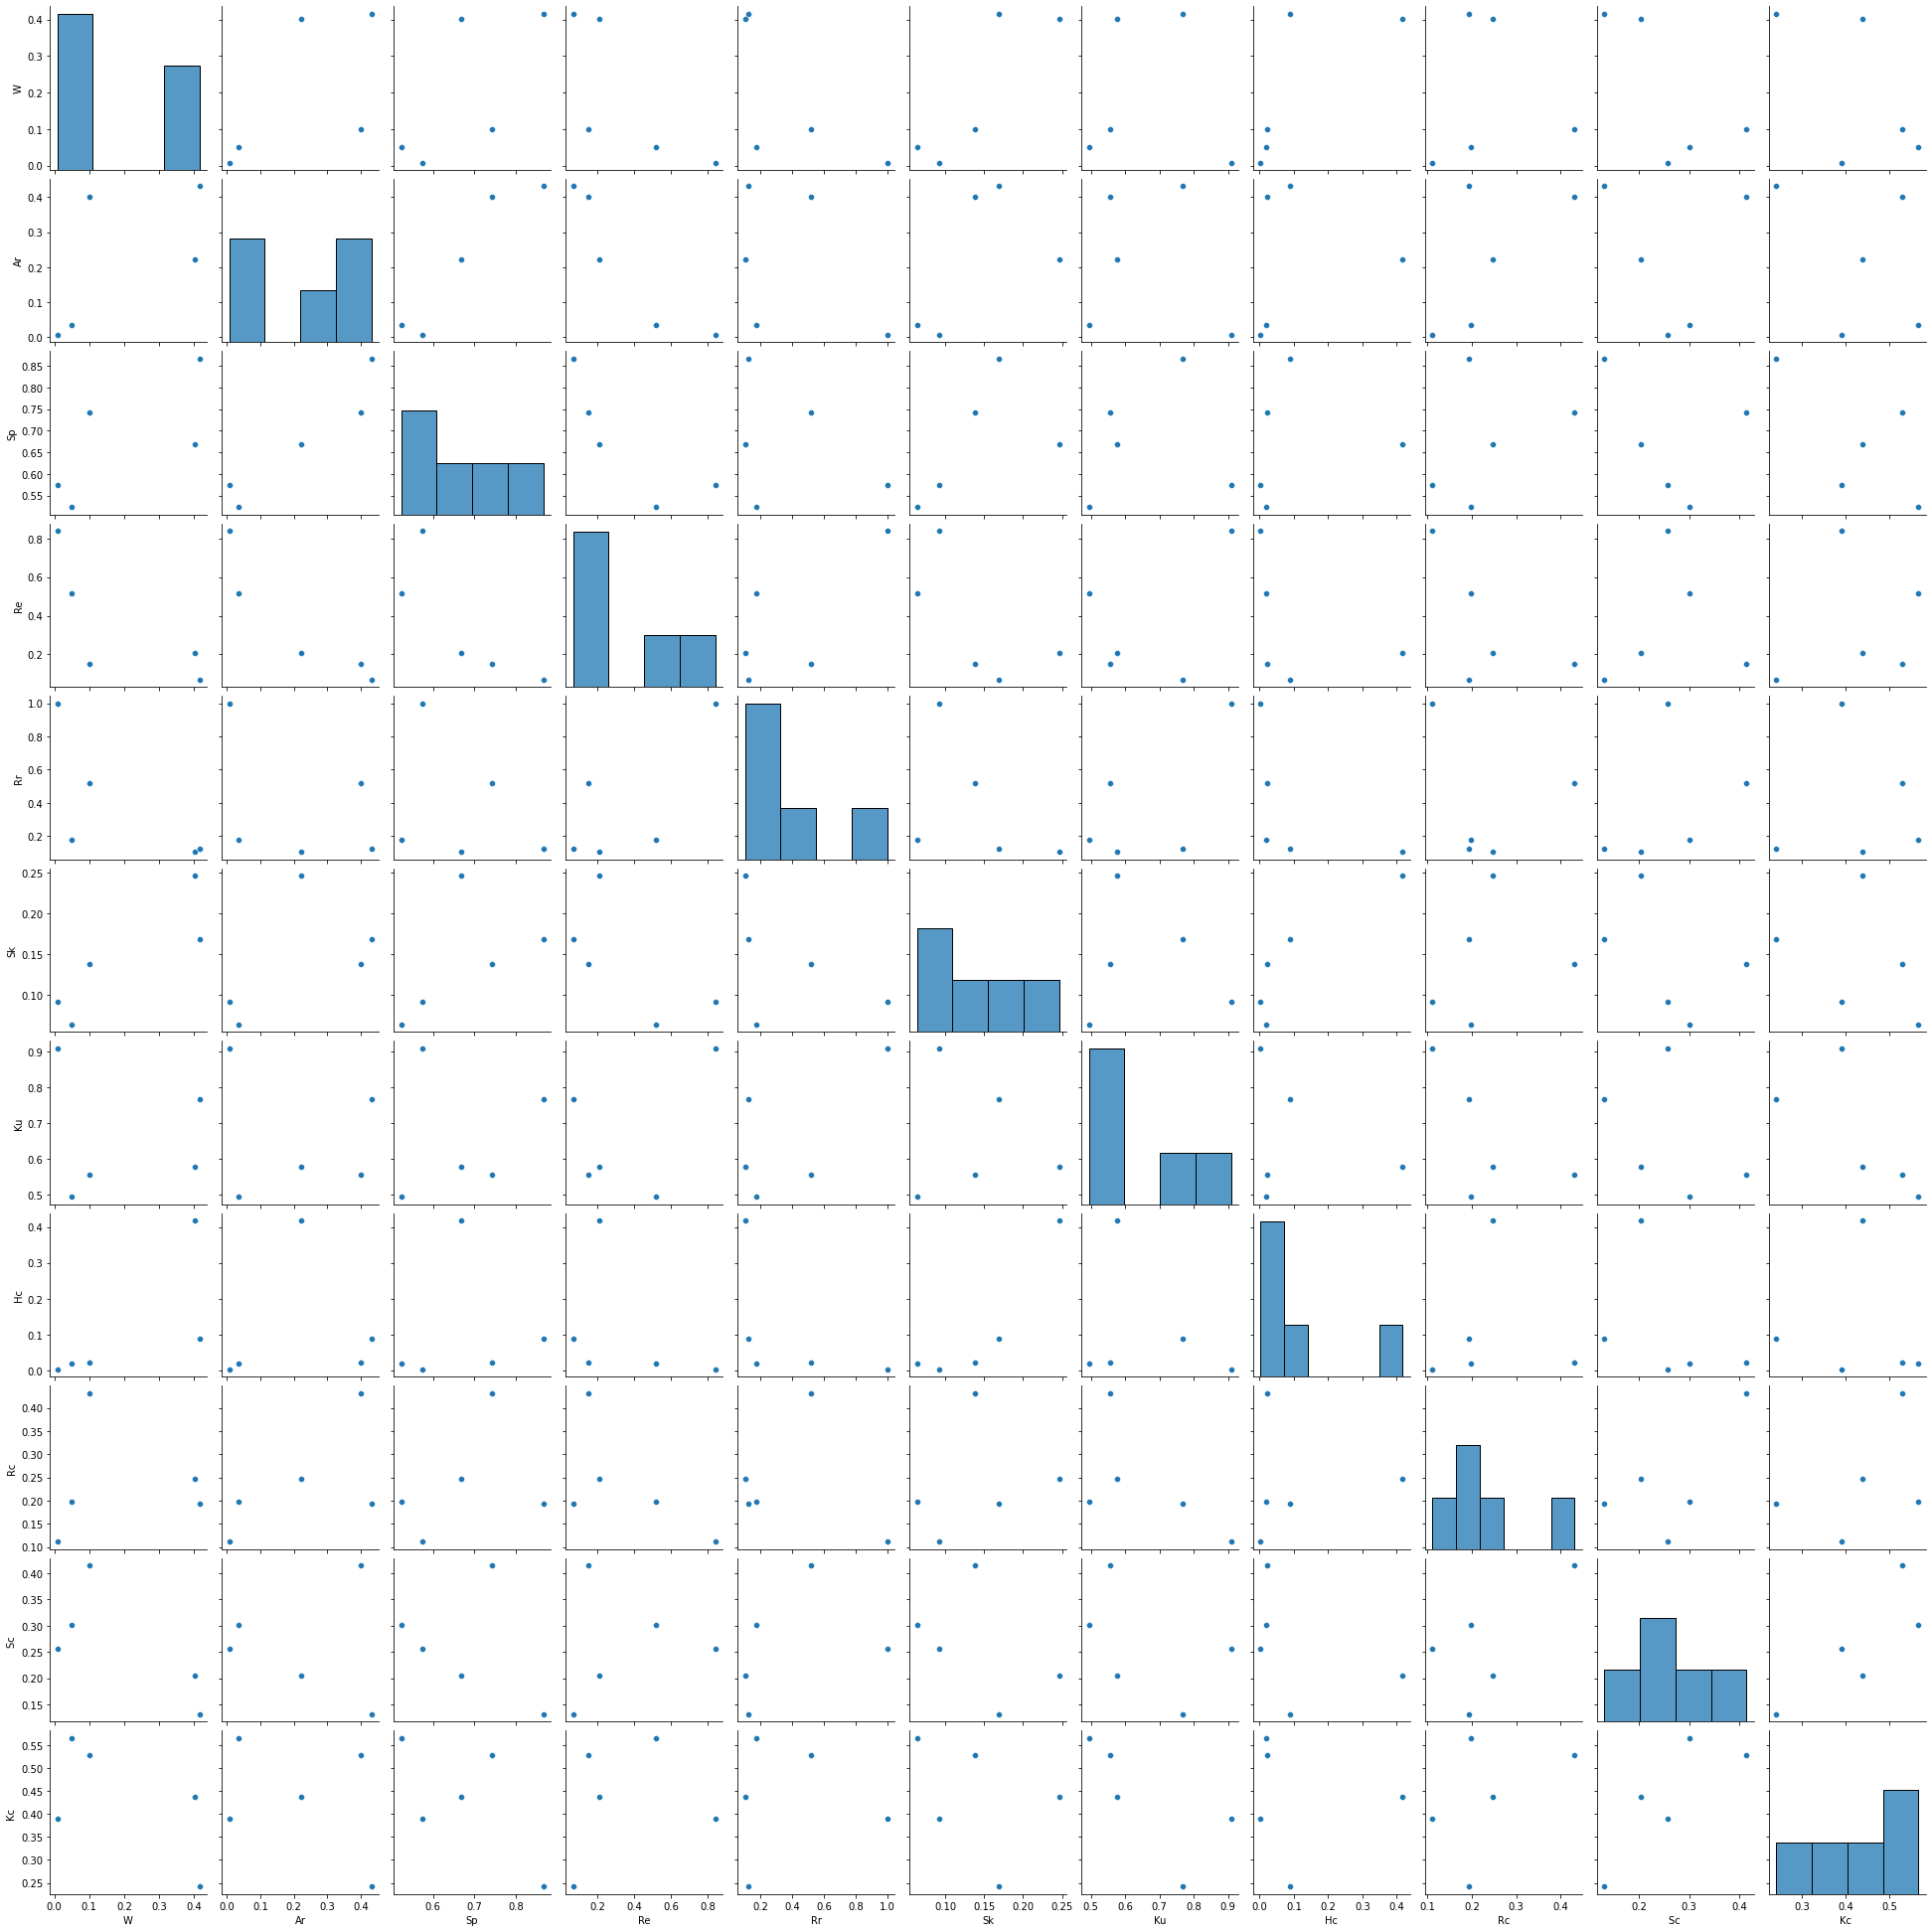

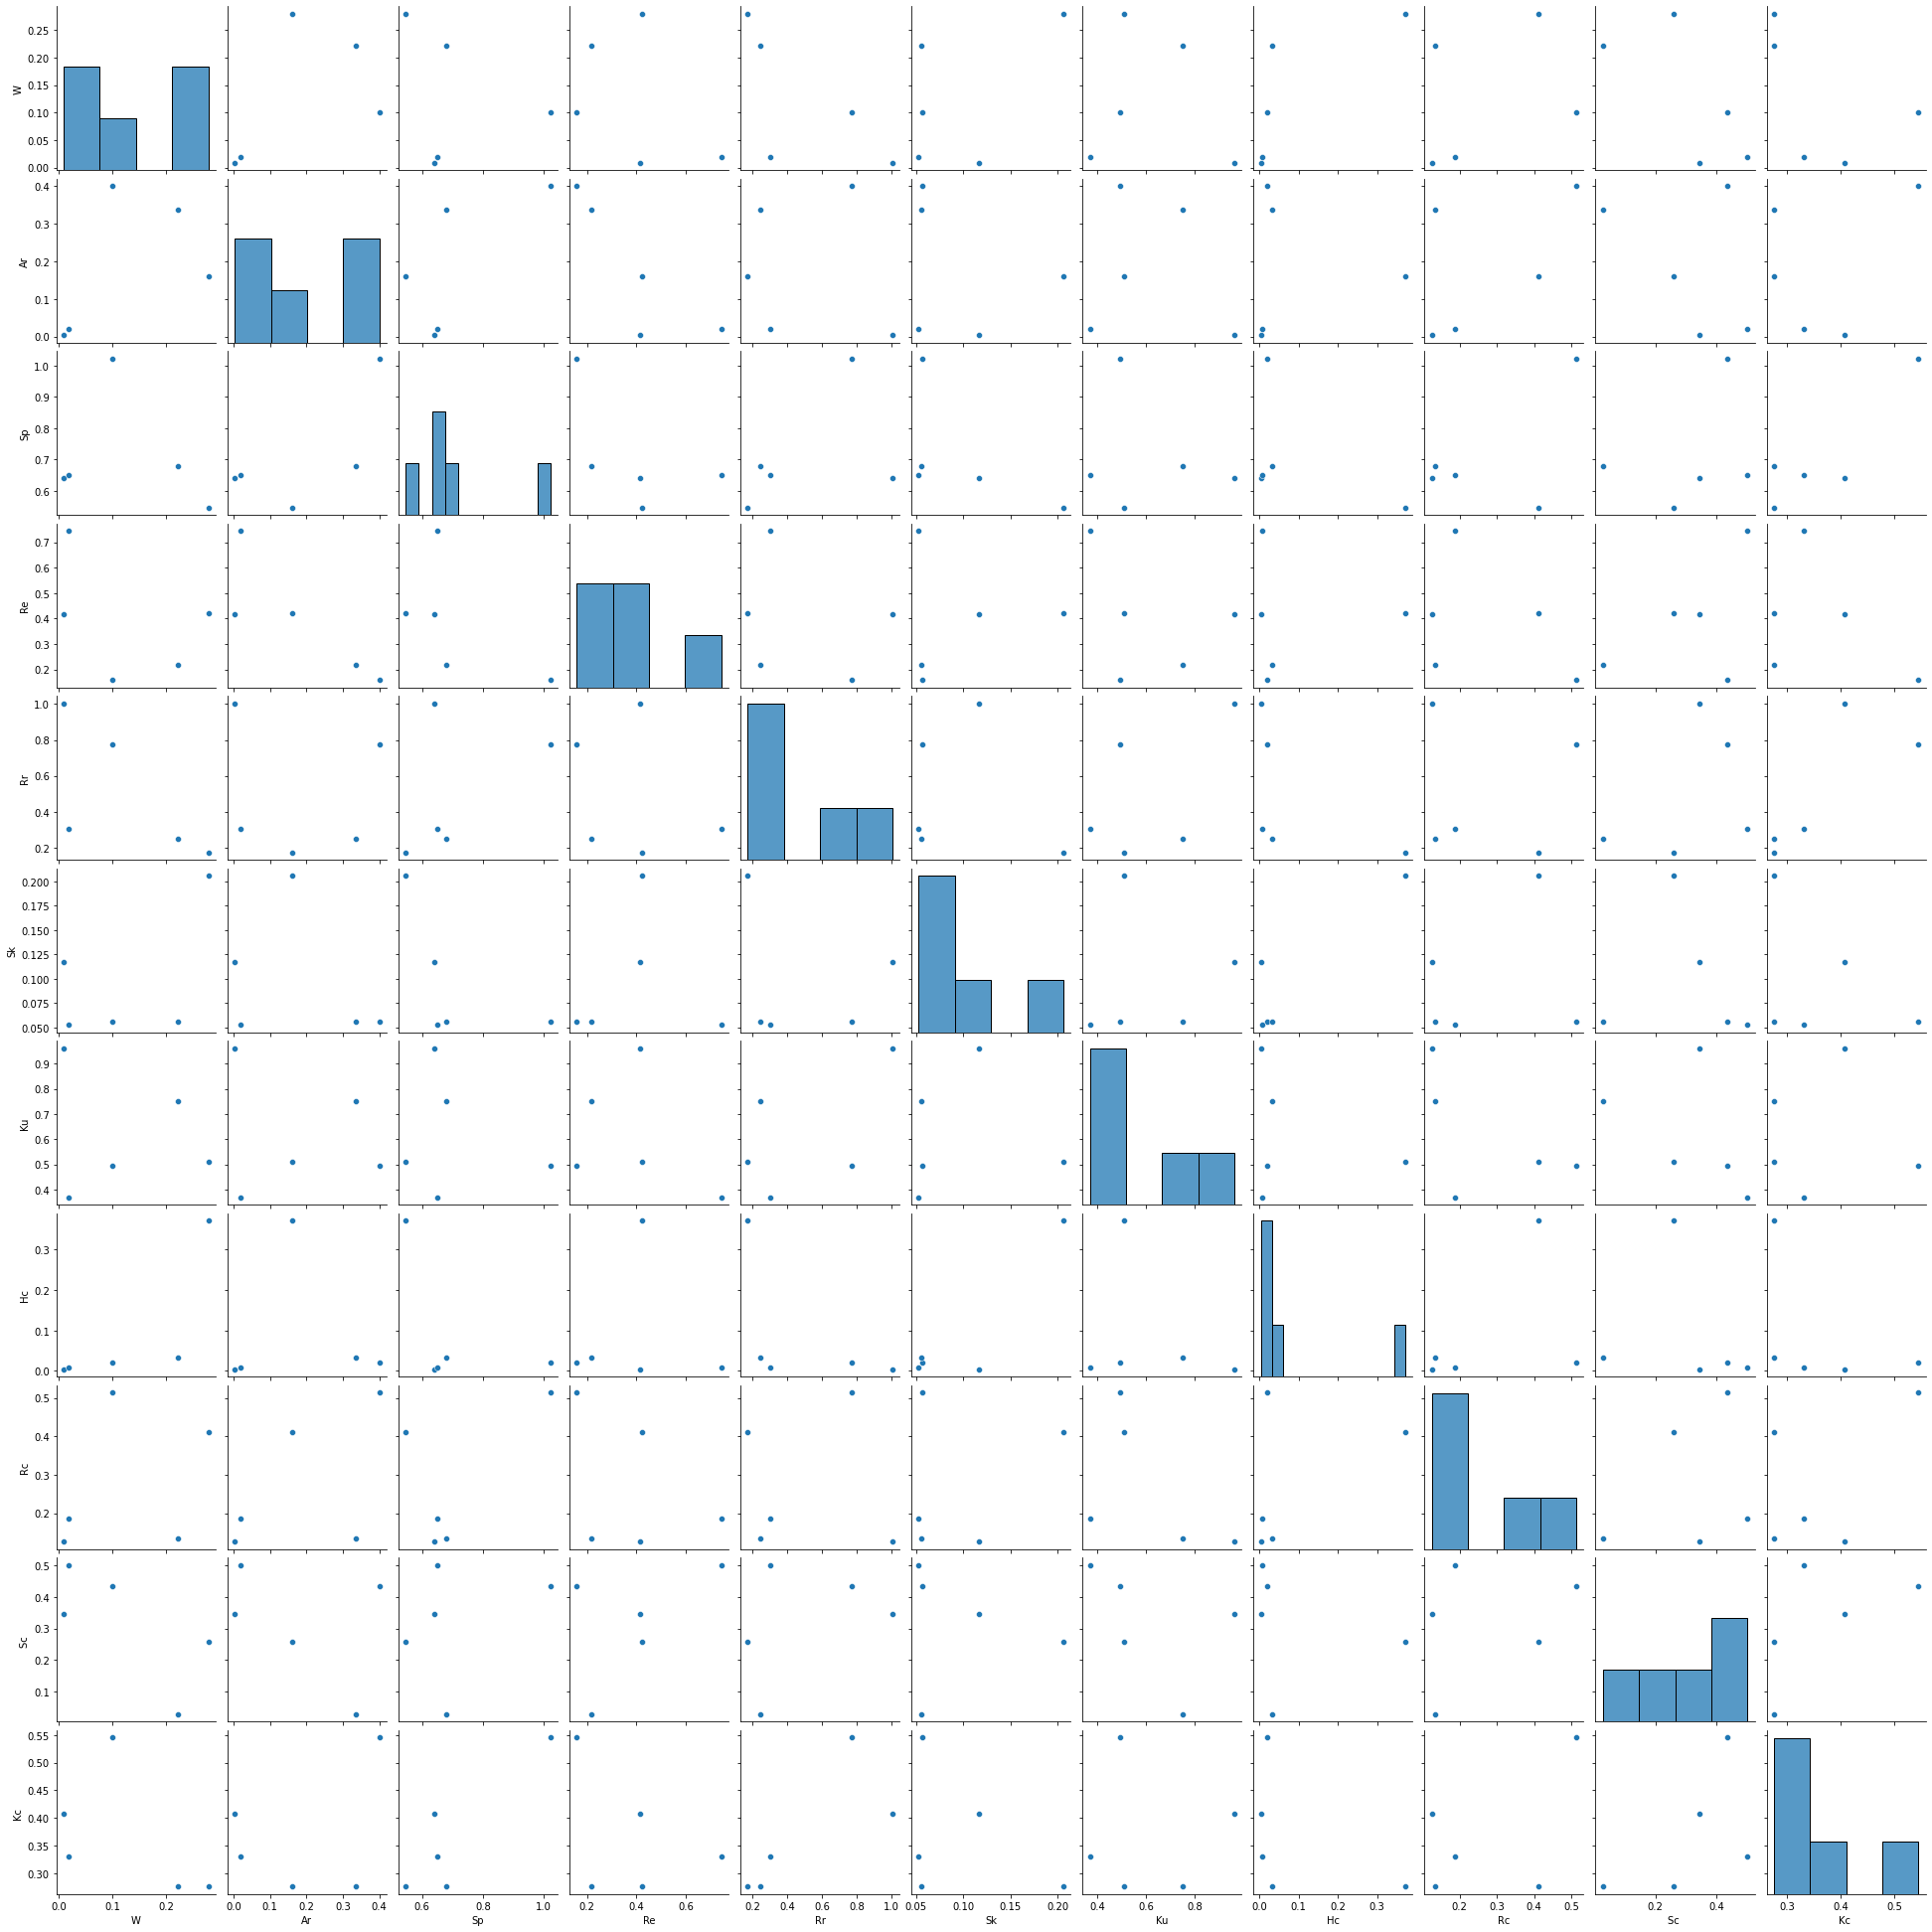

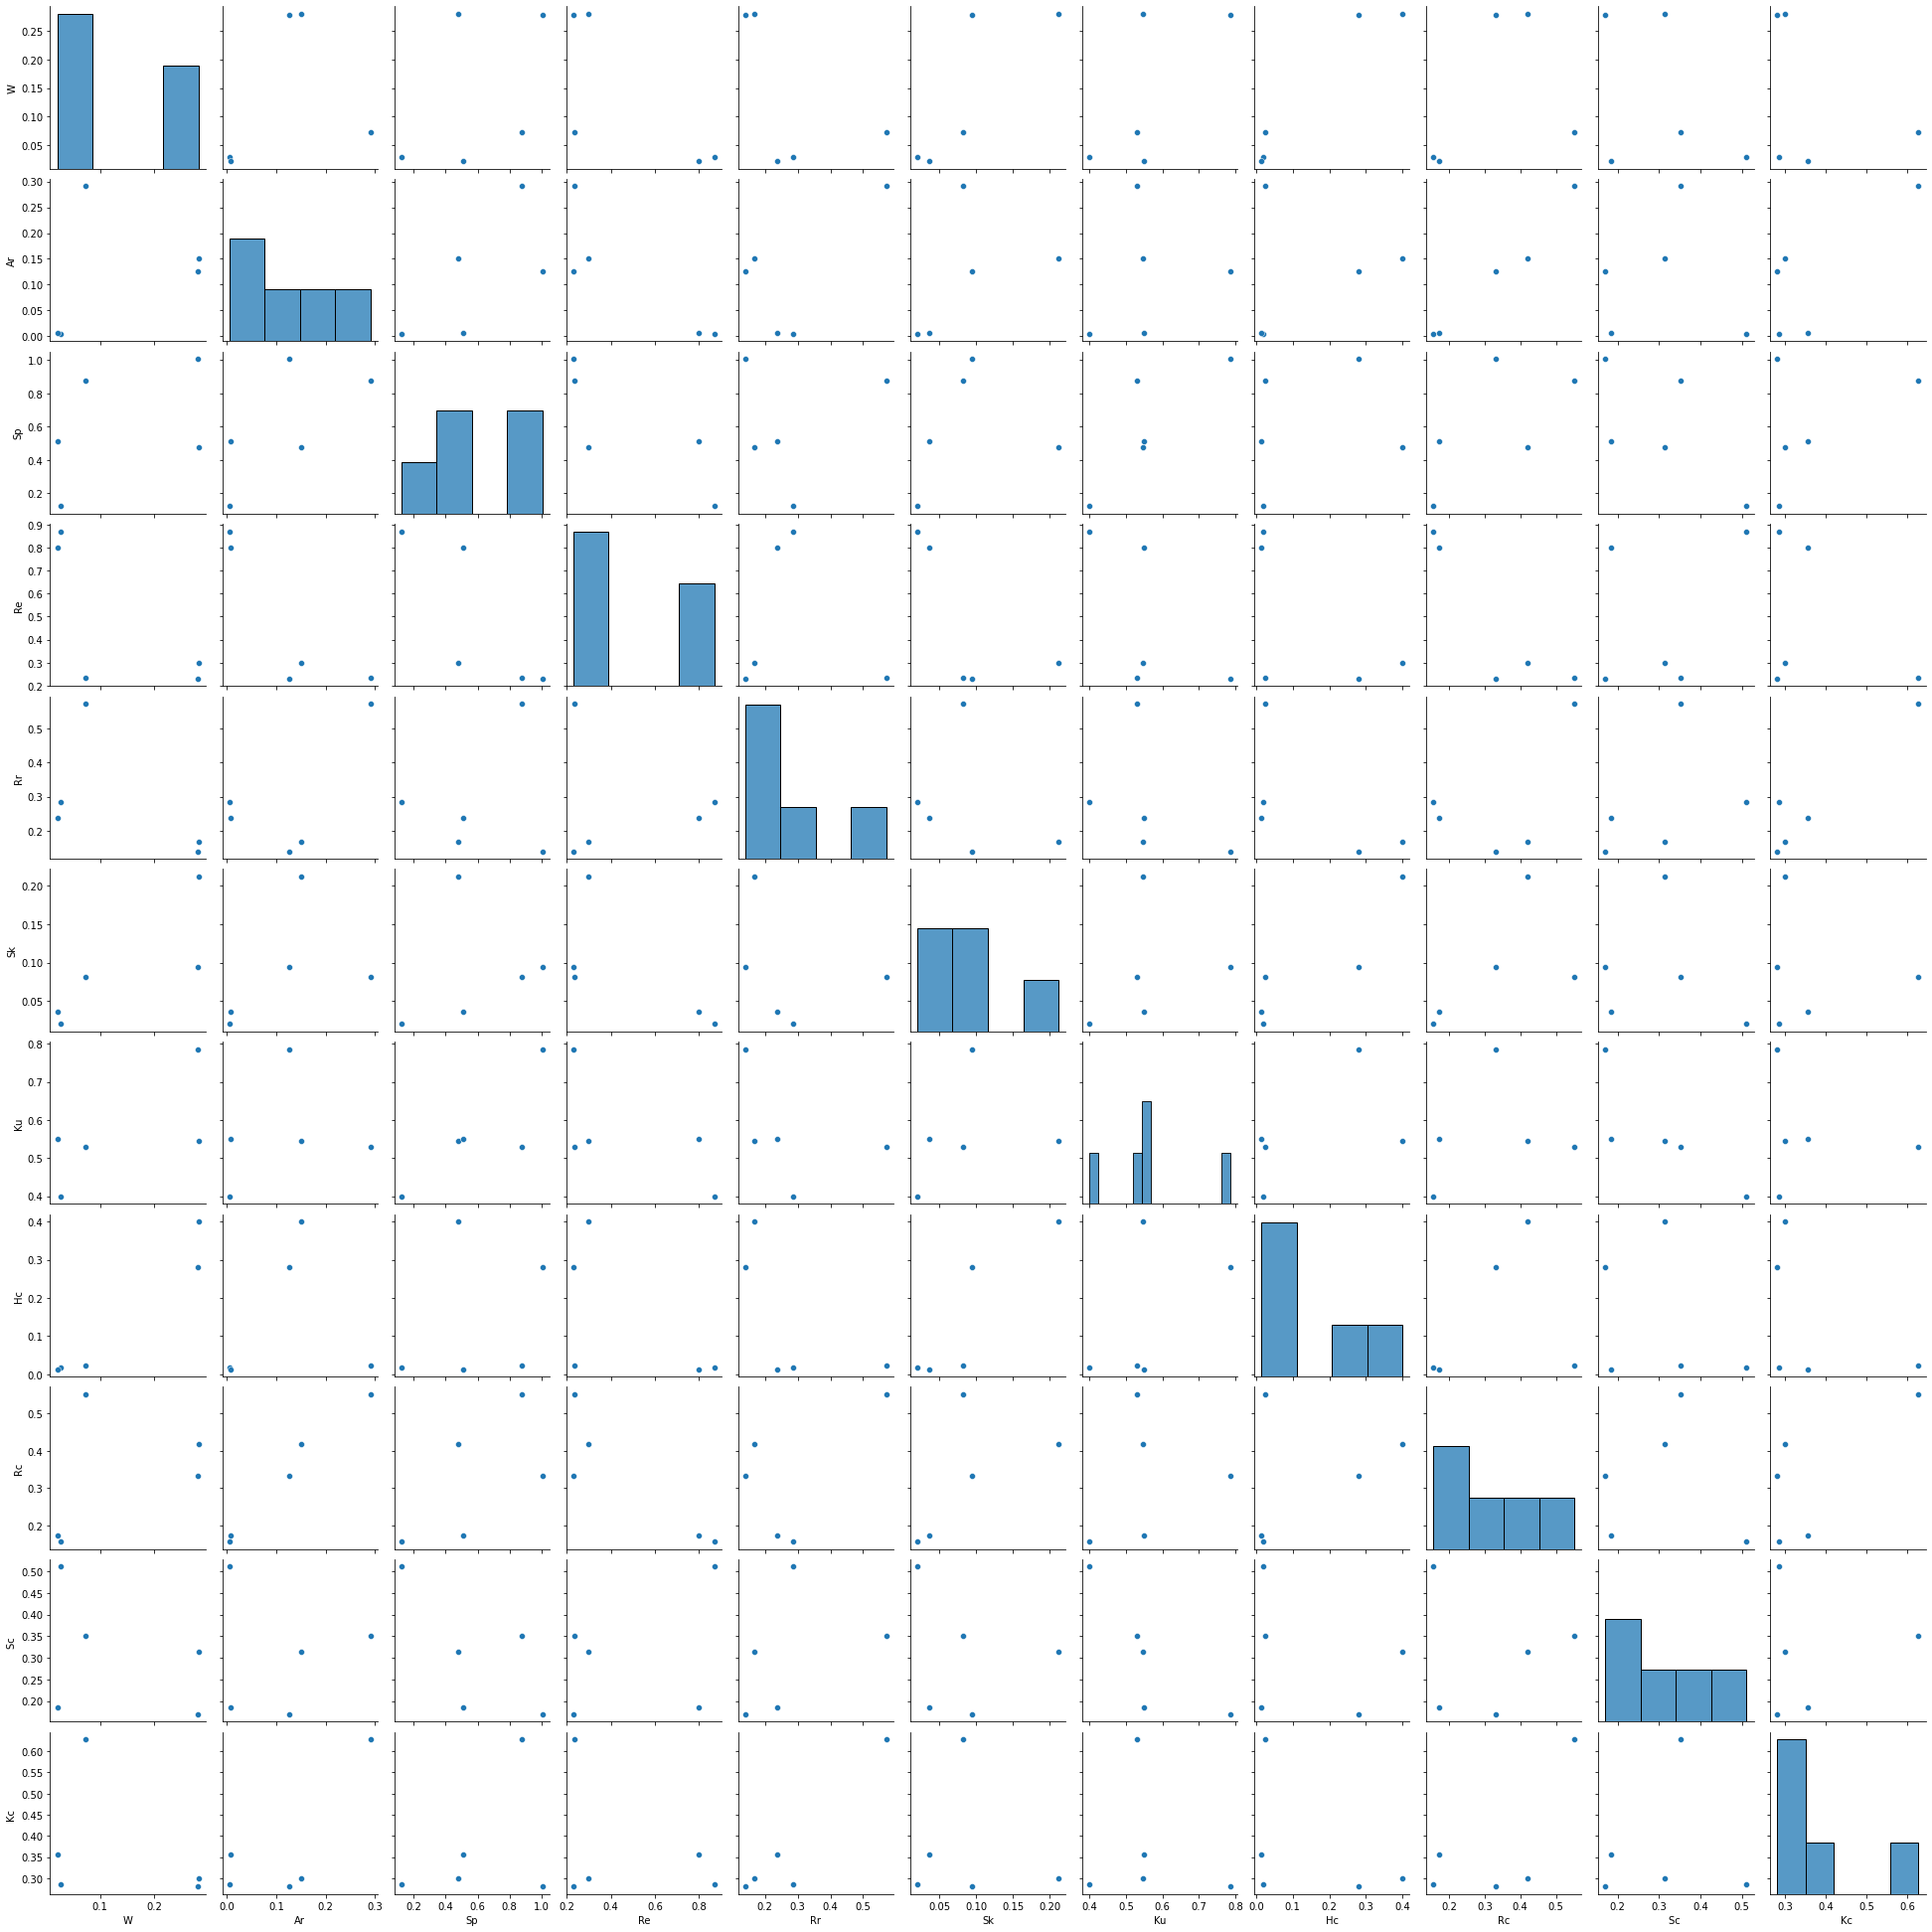

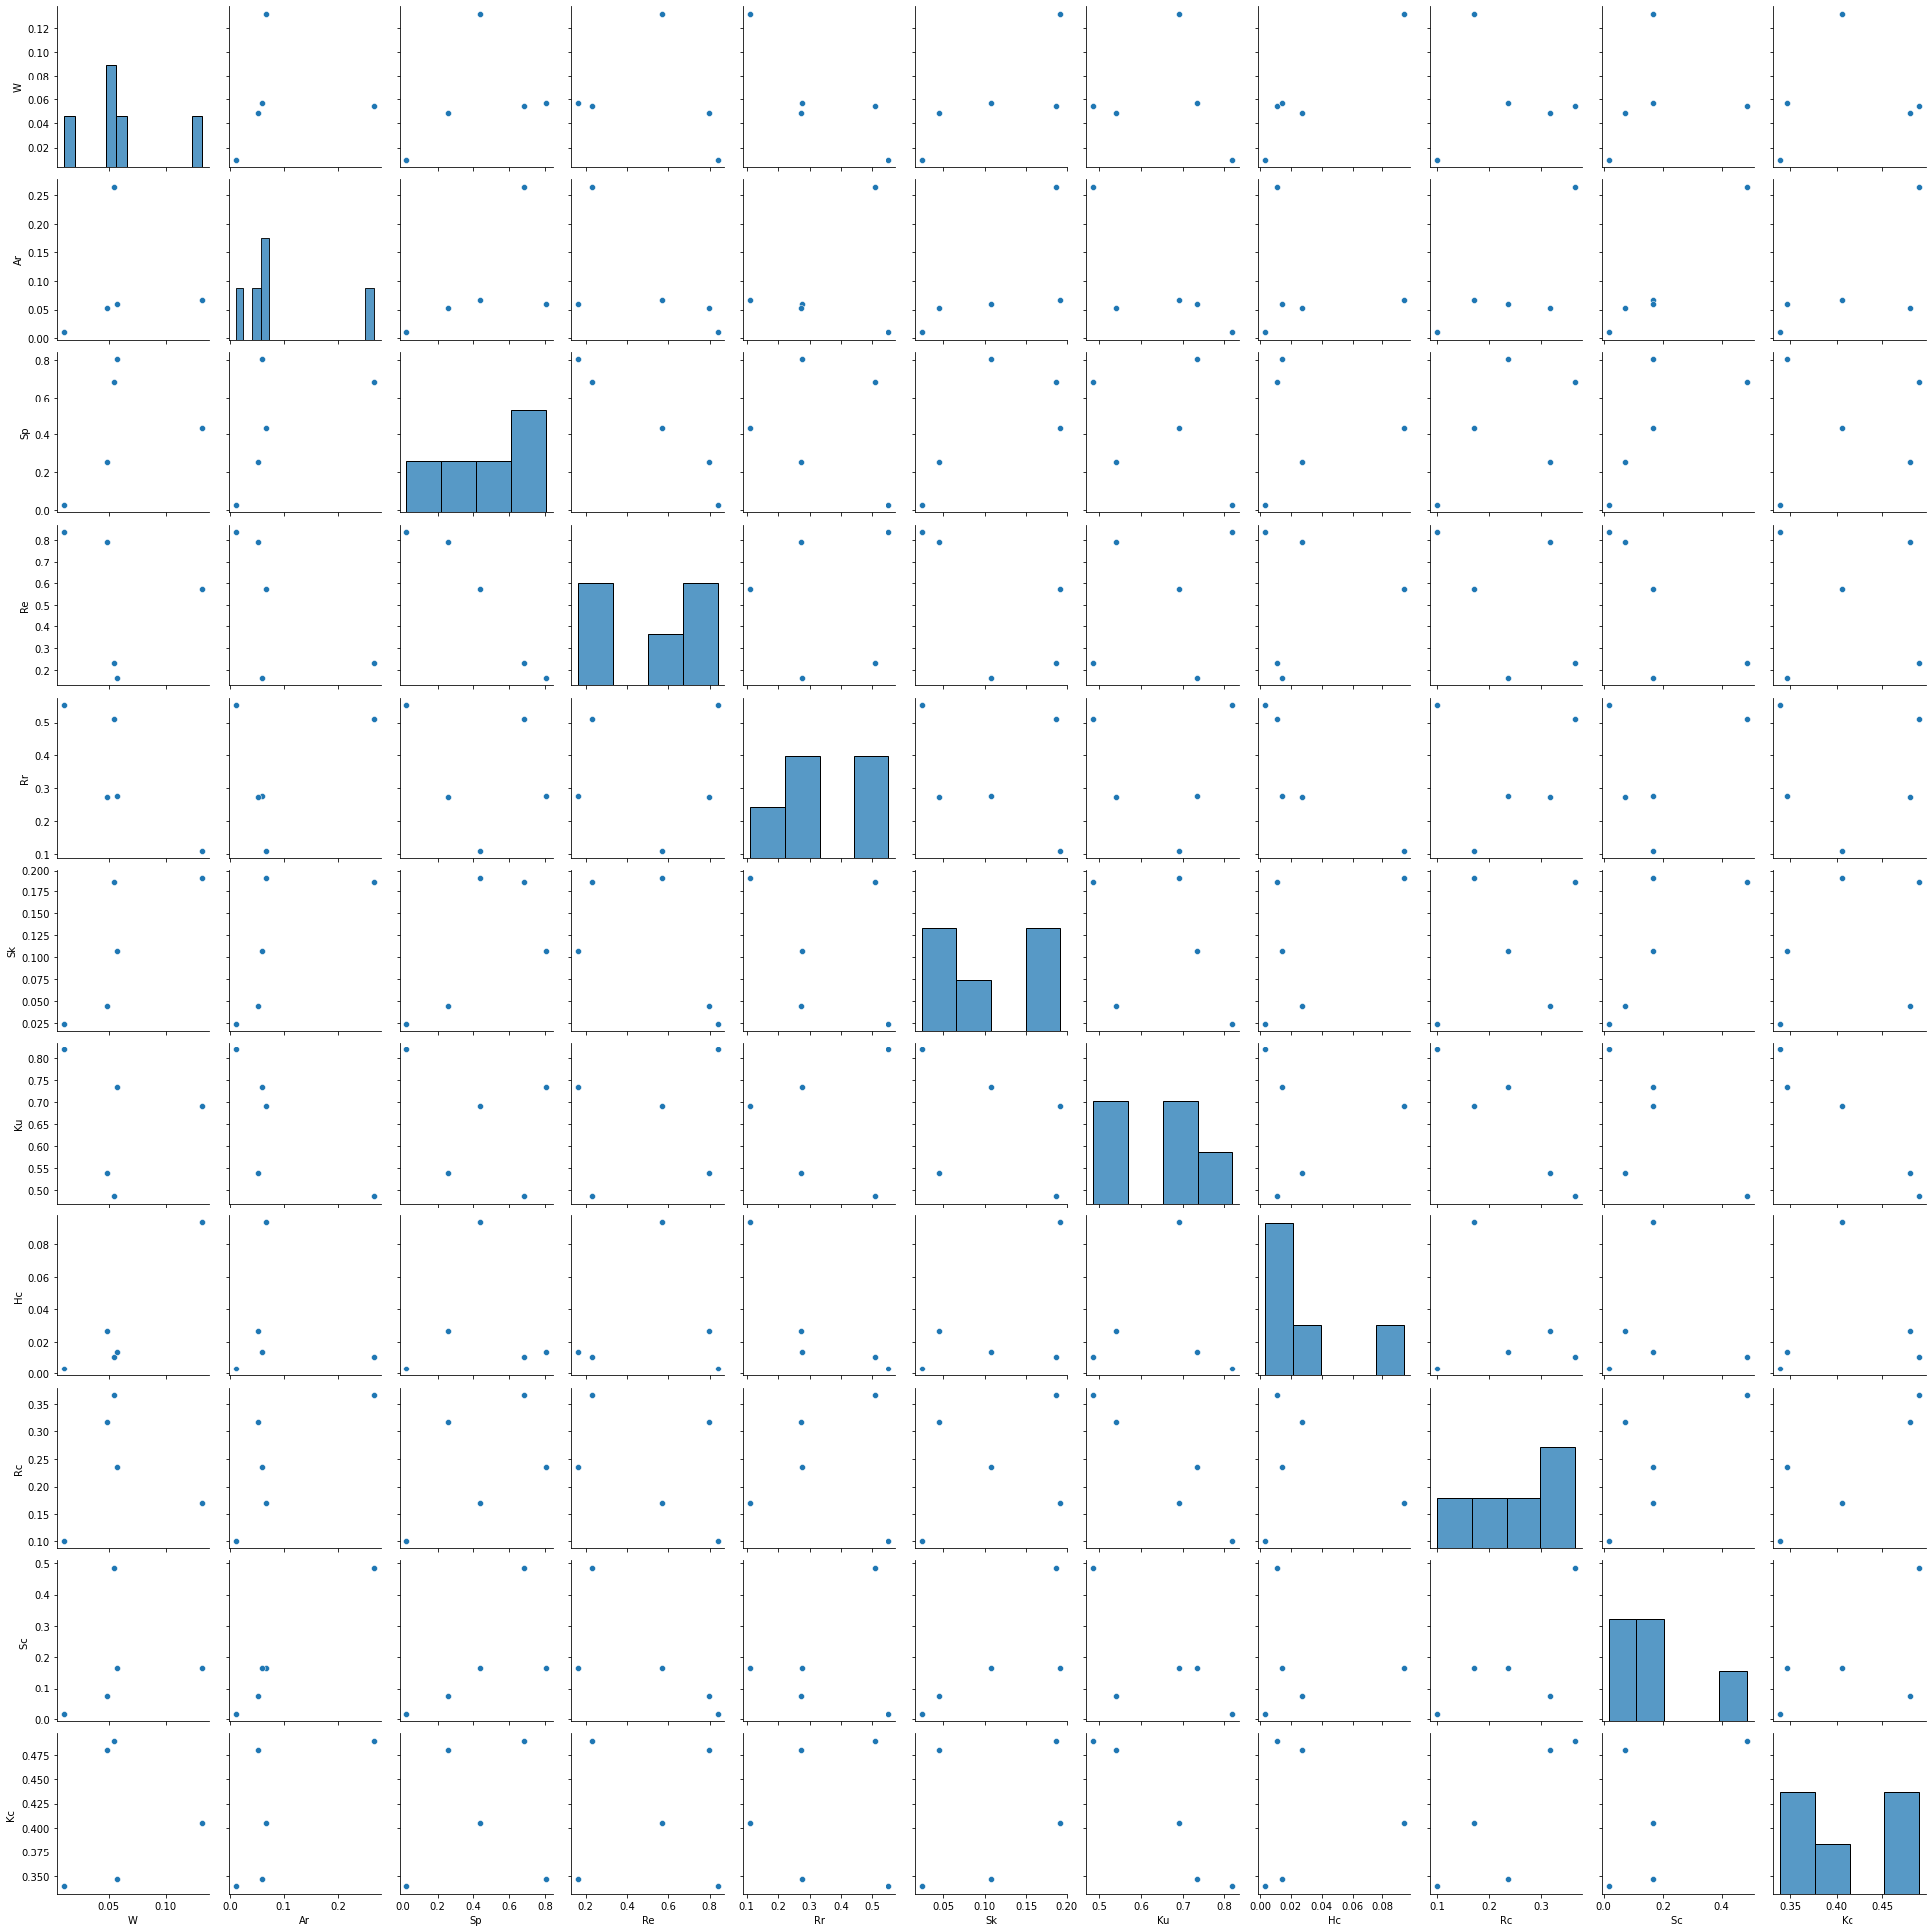

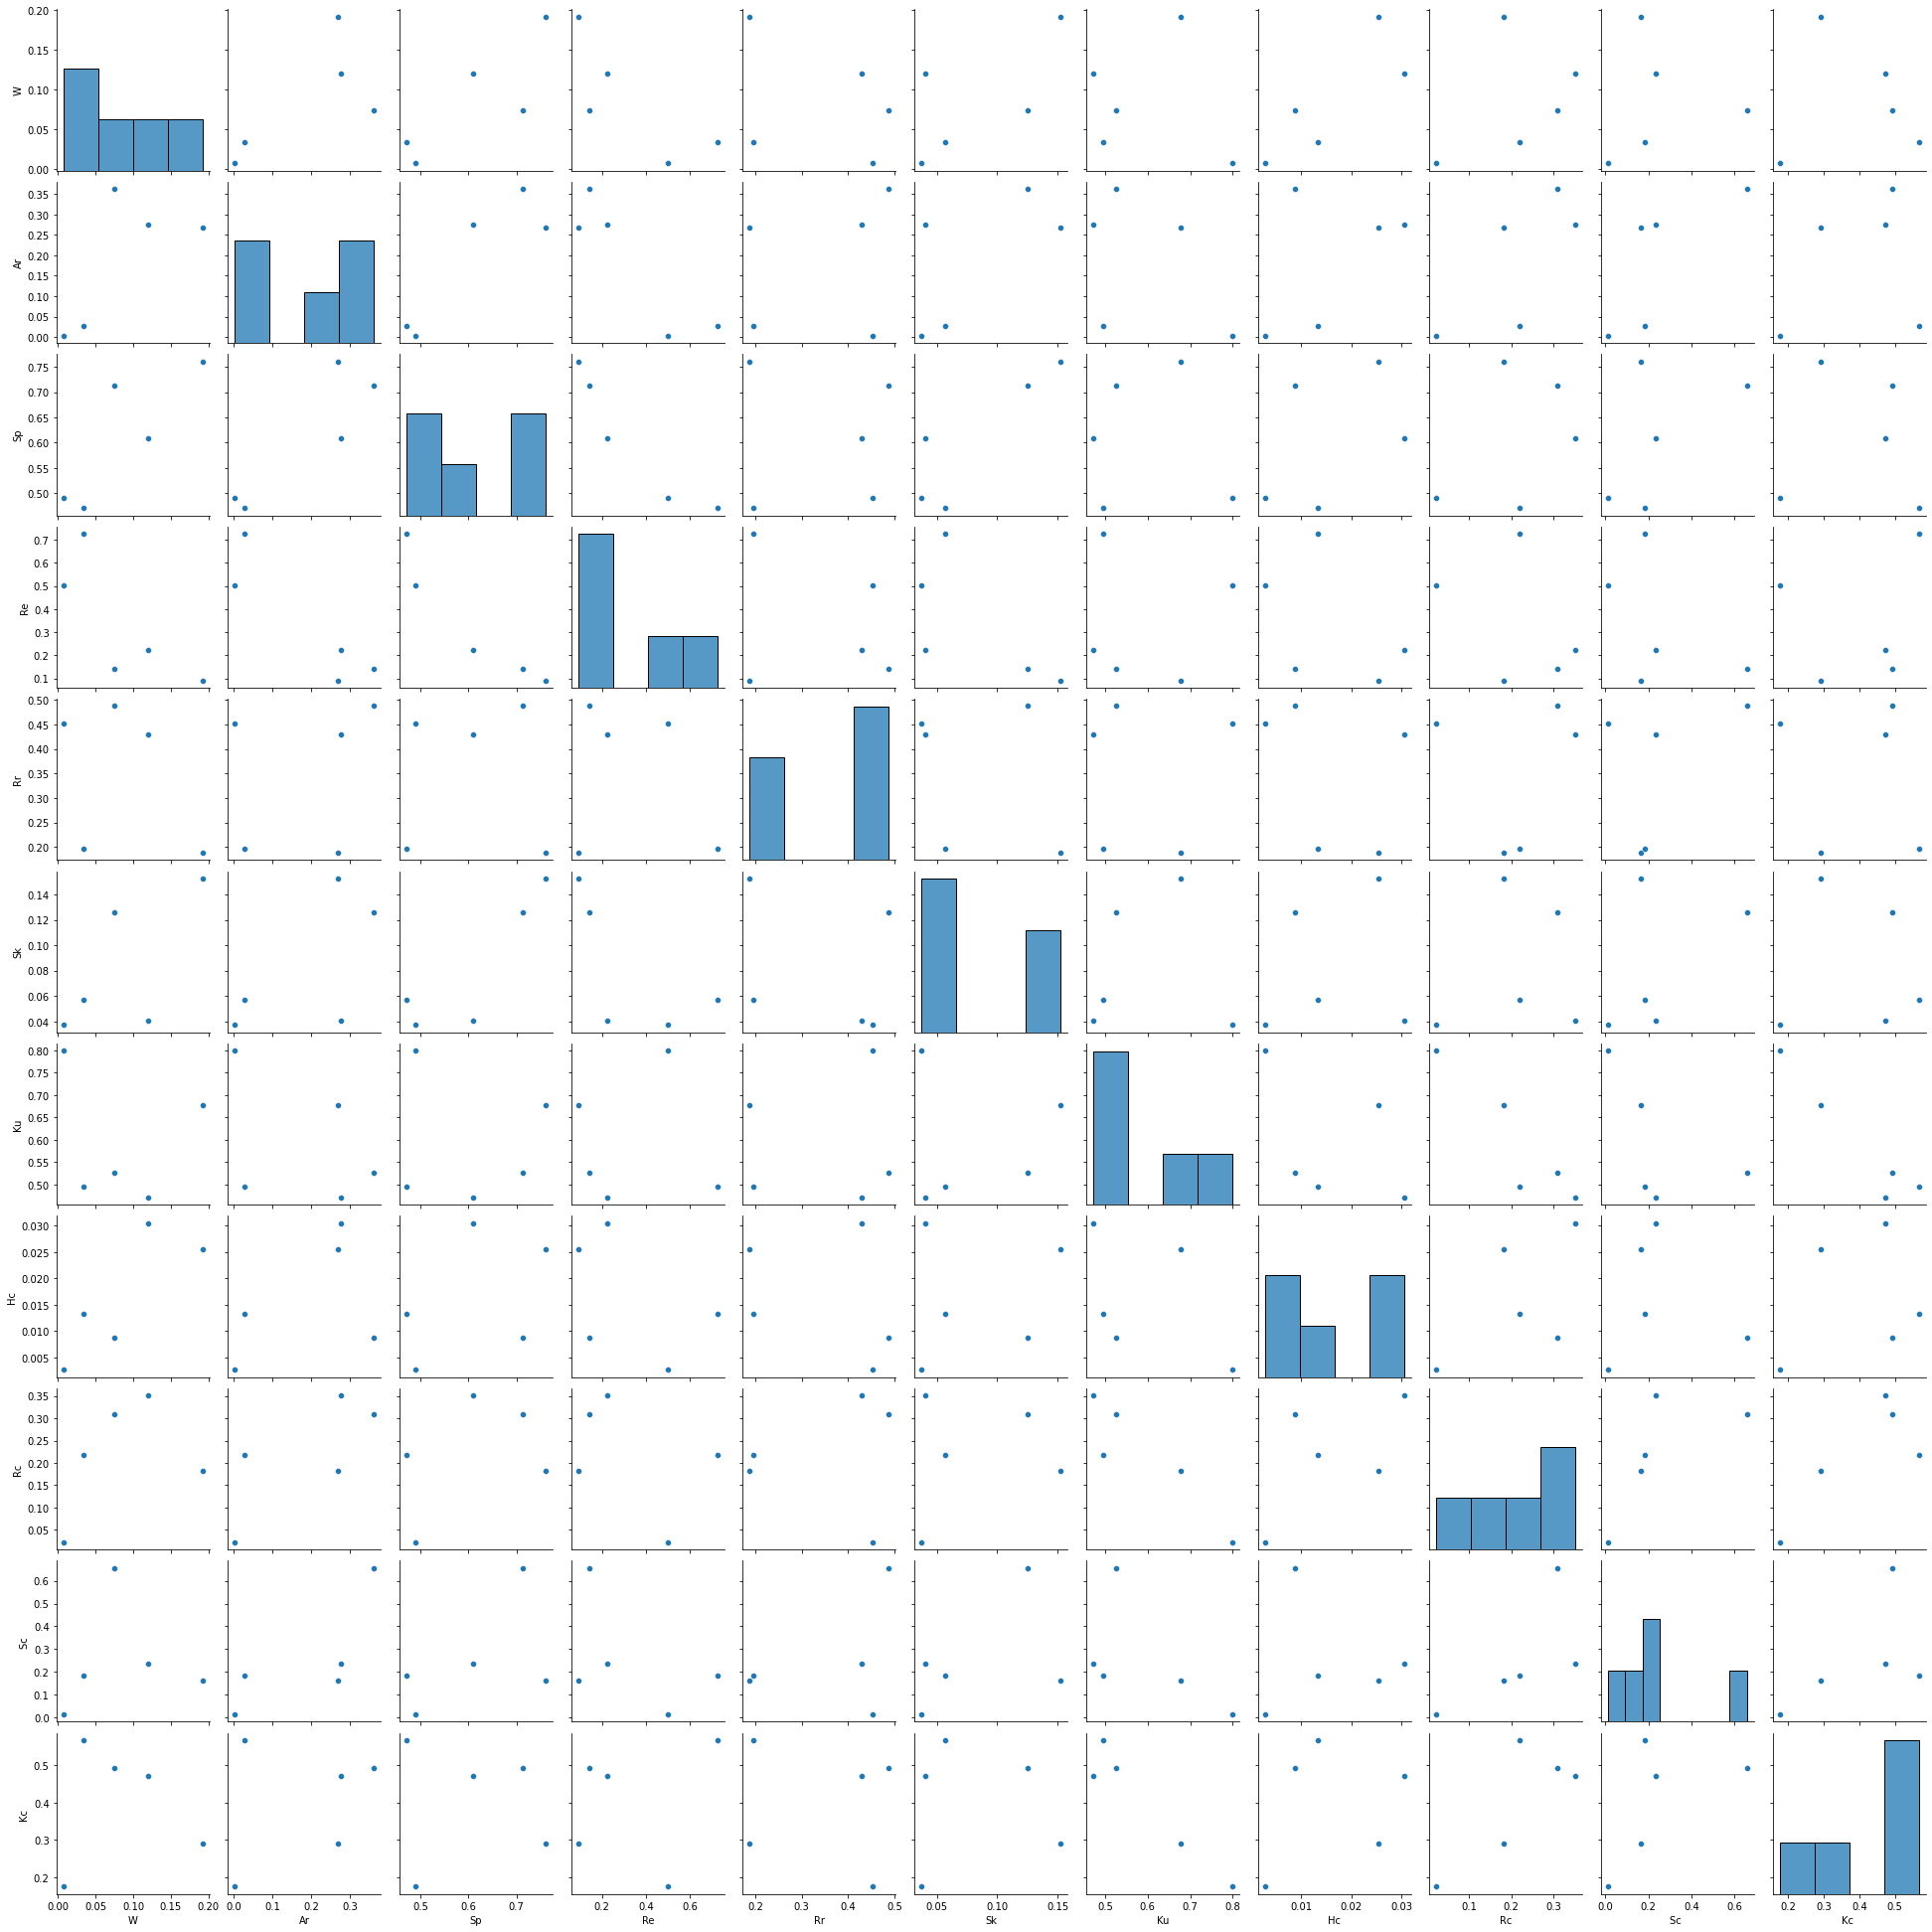

In [10]:
sns.pairplot(subset_1.groupby('Type').first())
sns.pairplot(subset_2.groupby('Type').first())
sns.pairplot(subset_3.groupby('Type').first())
sns.pairplot(subset_4.groupby('Type').first())
sns.pairplot(subset_5.groupby('Type').first())

### Question 9

<AxesSubplot:>

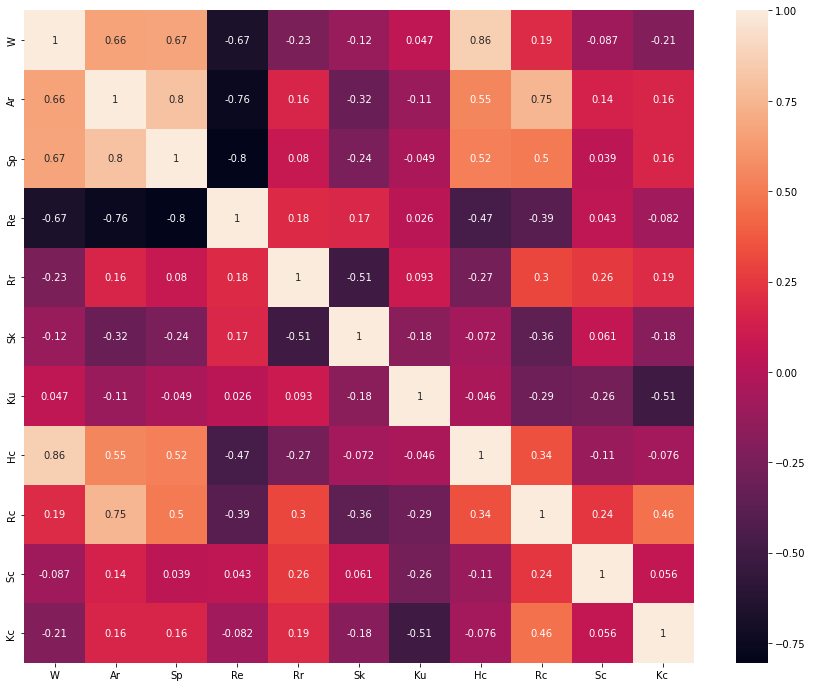

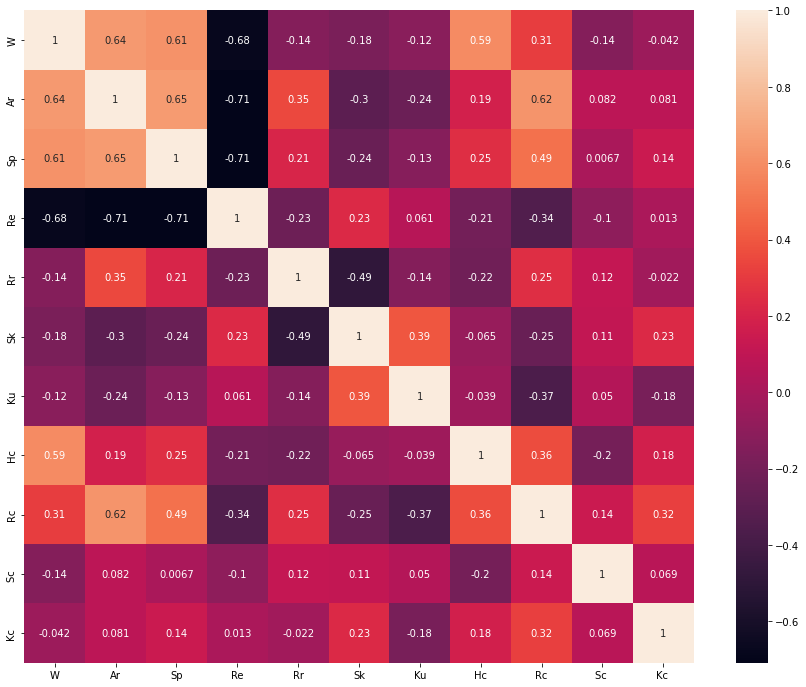

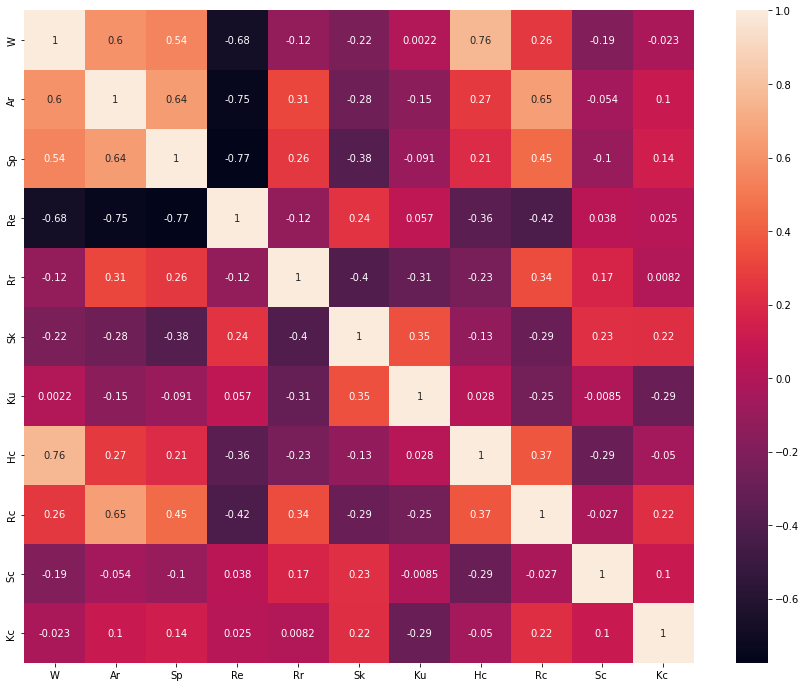

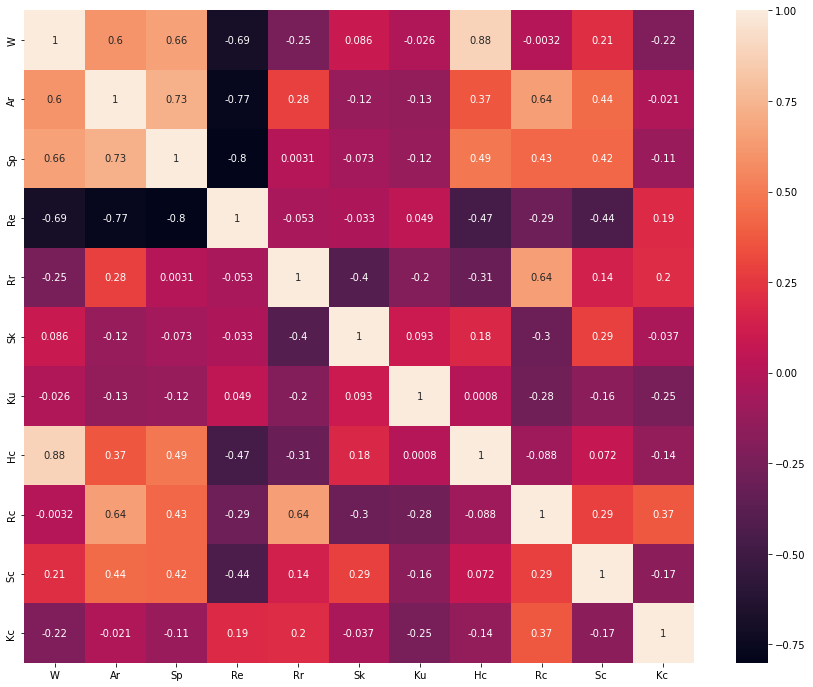

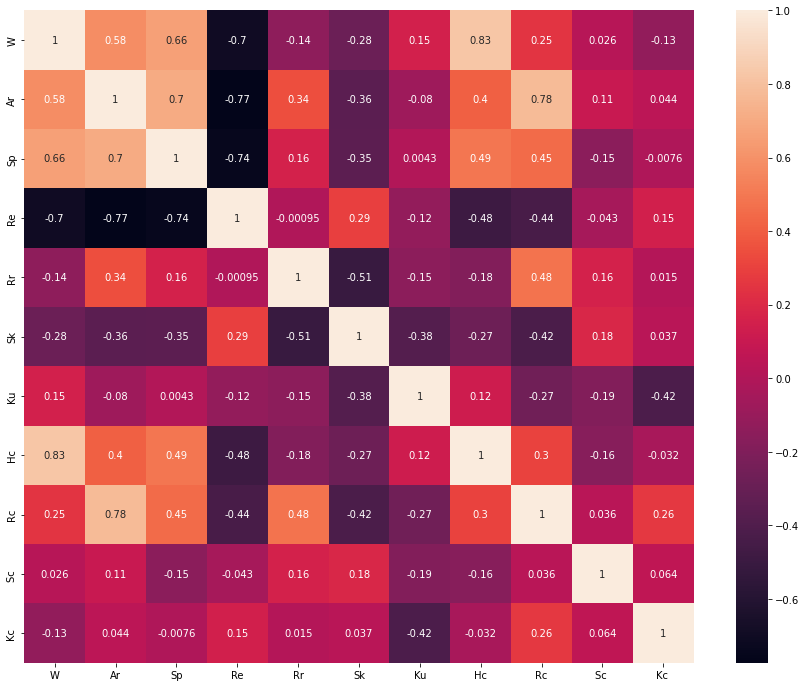

In [11]:
plt.figure(figsize=(15,12))
corr = subset_1.corr()
sns.heatmap(corr, annot=True)

plt.figure(figsize=(15,12))
corr = subset_2.corr()
sns.heatmap(corr, annot=True)

plt.figure(figsize=(15,12))
corr = subset_3.corr()
sns.heatmap(corr, annot=True)

plt.figure(figsize=(15,12))
corr = subset_4.corr()
sns.heatmap(corr, annot=True)

plt.figure(figsize=(15,12))
corr = subset_5.corr()
sns.heatmap(corr, annot=True)

### Question 10

W, Hc, Rc, Kc, Sp, Ar are the strongest as we can see in the heatmap.

## Part 2

In [12]:
X = df.drop('Type', axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Question 1

We will use the Columns which are the strongest from the heatmap.

### Question 2

In [13]:
dt_1 = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=1, max_leaf_nodes=5)
dt_1.fit(X_train, y_train)


dt_2 = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=1, max_leaf_nodes=5)
dt_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_leaf_nodes=5)

In [14]:
y_predict = dt_1.predict(X_test)
y_predict_2 = dt_2.predict(X_test)

In [15]:
accuracy_score(y_test,y_predict)

0.7777777777777778

In [16]:
accuracy_score(y_test, y_predict_2)

1.0

## Question 3

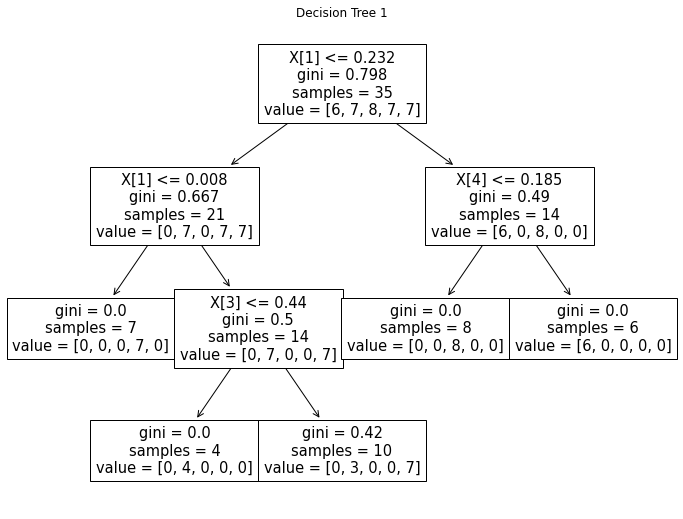

In [17]:
plt.figure(figsize=(12,9))
plot_tree(dt_1)
plt.title("Decision Tree 1")
plt.show()

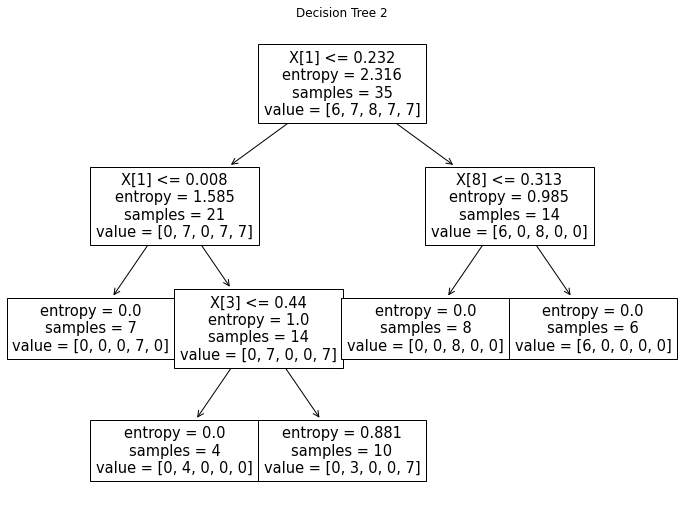

In [18]:
plt.figure(figsize=(12,9))
plot_tree(dt_2)
plt.title("Decision Tree 2")
plt.show()

## Question 4

In [19]:
print(export_text(dt_1))

|--- feature_1 <= 0.23
|   |--- feature_1 <= 0.01
|   |   |--- class: PO
|   |--- feature_1 >  0.01
|   |   |--- feature_3 <= 0.44
|   |   |   |--- class: LF
|   |   |--- feature_3 >  0.44
|   |   |   |--- class: SL
|--- feature_1 >  0.23
|   |--- feature_4 <= 0.19
|   |   |--- class: LP
|   |--- feature_4 >  0.19
|   |   |--- class: CR



In [20]:
print(export_text(dt_2))

|--- feature_1 <= 0.23
|   |--- feature_1 <= 0.01
|   |   |--- class: PO
|   |--- feature_1 >  0.01
|   |   |--- feature_3 <= 0.44
|   |   |   |--- class: LF
|   |   |--- feature_3 >  0.44
|   |   |   |--- class: SL
|--- feature_1 >  0.23
|   |--- feature_8 <= 0.31
|   |   |--- class: LP
|   |--- feature_8 >  0.31
|   |   |--- class: CR



## Question 6

The second Decision tree will give good results as the second DecisionTree was made with custom values and in the accuracy score metric it also gave 88% accuracy when tested. In my opinion DecisionTree2 is much better as it can also be seen when the Decision Trees were plotted using plot_tree method that Second DecisionTree performs much better.

## Question 7

In [21]:
print("Mean Accuracy for first Decision Tree:",dt_1.score(X_test, y_test))

Mean Accuracy for first Decision Tree: 0.7777777777777778


In [22]:
print("Mean Accuracy for second Decision Tree:",dt_2.score(X_test, y_test))

Mean Accuracy for second Decision Tree: 1.0


## Question 8

In [23]:
y_pred_1 = dt_1.predict(X_test)
y_pred_2 = dt_2.predict(X_test)

print(y_pred_1)
print(y_pred_2)

['CR' 'CR' 'PO' 'SL' 'CR' 'SL' 'SL' 'PO' 'PO']
['LP' 'LP' 'PO' 'SL' 'CR' 'SL' 'SL' 'PO' 'PO']


## Question 9

<AxesSubplot:>

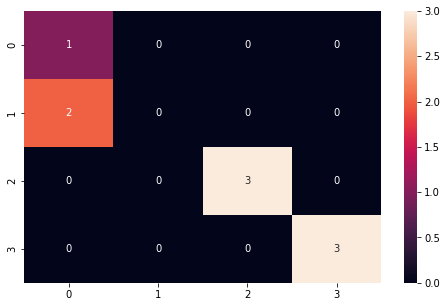

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True)

<AxesSubplot:>

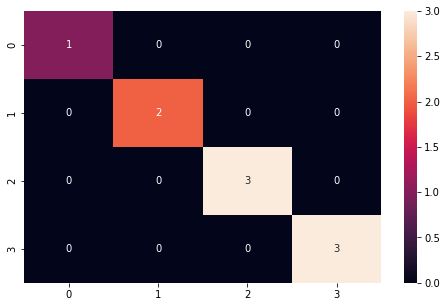

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True)

## Question 10

In [26]:
print("\t\t\tFirst Decision Tree\n\n")
print(classification_report(y_test, y_pred_1))

			First Decision Tree


              precision    recall  f1-score   support

          CR       0.33      1.00      0.50         1
          LP       0.00      0.00      0.00         2
          PO       1.00      1.00      1.00         3
          SL       1.00      1.00      1.00         3

    accuracy                           0.78         9
   macro avg       0.58      0.75      0.62         9
weighted avg       0.70      0.78      0.72         9



In [27]:
print("\t\t\tSecond Decision Tree\n\n")
print(classification_report(y_test, y_pred_2))

			Second Decision Tree


              precision    recall  f1-score   support

          CR       1.00      1.00      1.00         1
          LP       1.00      1.00      1.00         2
          PO       1.00      1.00      1.00         3
          SL       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



# Part 3: Classification with Ensemble Algorithms

## Question 1

In [28]:
final_df = pd.merge(subset_1, subset_2, how='outer')
final_df = pd.merge(final_df, subset_3, how='outer')
final_df = pd.merge(final_df, subset_4, how='outer')
final_df = pd.merge(final_df, subset_5, how='outer')

## Question 2

In [29]:
X = final_df.drop('Type', axis=1)
y = final_df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Question 3

### (a)

In [30]:
rf_clf = RandomForestClassifier(max_depth=20, criterion='gini')

In [31]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

### (b)

In [32]:
adb_clf = AdaBoostClassifier(learning_rate=2)

In [33]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=2)

### (c)

In [34]:
b_clf = BaggingClassifier()

In [35]:
b_clf.fit(X_train, y_train)

BaggingClassifier()

### (d)

In [36]:
gb_clf = GradientBoostingClassifier()

In [37]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

## Question 4

In [38]:
accuracy_df = pd.DataFrame(columns=['Random Forest Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'Gradient Boosting Classifier'])

accuracies = []

In [39]:
y_pred_rf = rf_clf.predict(X_test)

In [40]:
accuracies.append(accuracy_score(y_test, y_pred_rf))

In [41]:
y_pred_adb = adb_clf.predict(X_test)

In [42]:
accuracies.append(accuracy_score(y_test, y_pred_adb))

In [43]:
y_pred_b = b_clf.predict(X_test)

In [44]:
accuracies.append(accuracy_score(y_test, y_pred_b))

In [45]:
y_pred_gb = gb_clf.predict(X_test)

In [46]:
accuracies.append(accuracy_score(y_test, y_pred_gb))

In [47]:
accuracies
accuracy_df.loc[len(accuracy_df)] = accuracies

In [48]:
accuracy_df

,Random Forest Classifier,AdaBoost Classifier,Bagging Classifier,Gradient Boosting Classifier
0,0.954545,0.636364,0.931818,0.886364


## Question 5

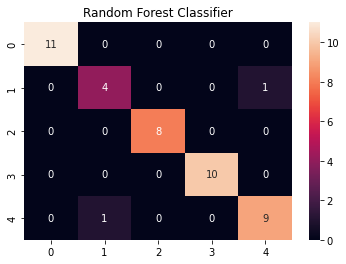

In [49]:
sns.heatmap(confusion_matrix(y_pred_rf, y_test), annot=True)
plt.title('Random Forest Classifier')
plt.show()

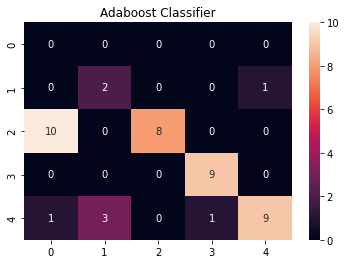

In [50]:
sns.heatmap(confusion_matrix(y_pred_adb, y_test), annot=True)
plt.title('Adaboost Classifier')
plt.show()

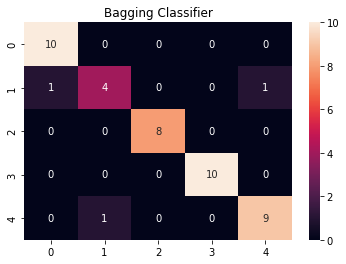

In [51]:
sns.heatmap(confusion_matrix(y_pred_b, y_test), annot=True)
plt.title('Bagging Classifier')
plt.show()

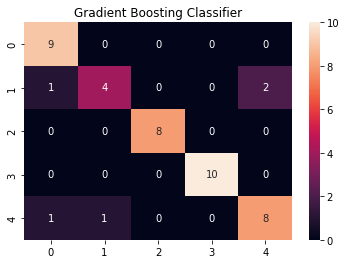

In [52]:
sns.heatmap(confusion_matrix(y_pred_gb, y_test), annot=True)
plt.title('Gradient Boosting Classifier')
plt.show()

## Part 4: Evaluating Classifiers

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred_knn = knn.predict(X_test)

In [56]:
accuracy_score(y_test , y_pred_knn)

0.8863636363636364

In [57]:
y_score = cross_val_predict(knn, X, y, cv=10 ,method='predict_proba')

In [58]:
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

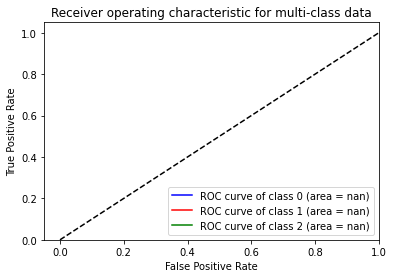

In [59]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Question 4

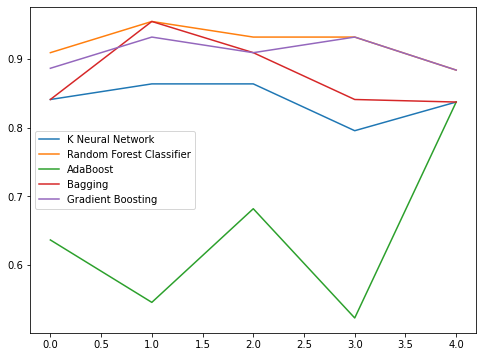

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(cross_val_score(knn, X, y))
plt.plot(cross_val_score(rf_clf, X, y))
plt.plot(cross_val_score(adb_clf, X, y))
plt.plot(cross_val_score(b_clf, X, y))
plt.plot(cross_val_score(gb_clf, X, y))
plt.legend(['K Neural Network', 'Random Forest Classifier', 'AdaBoost', 'Bagging', 'Gradient Boosting'])
plt.show()